In [ ]:
from random import randint
import networkx as nx
import matplotlib.pyplot as plt
from numpy import matrix as mat
from typing import List
from copy import deepcopy

# BFS-DFS

In [ ]:
no_of_nodes = 5
source = 0
destination = 3

In [ ]:
def generate_random_matrix(no_of_nodes):
    return [[randint(0,1) if i!=j else 0 for j in range(no_of_nodes)] for i in range(no_of_nodes)]

In [ ]:
class graph:
    def __init__(self, adj_mat, source, destination):
        self.no_of_nodes = len(adj_mat)
        self.adj_mat = adj_mat.copy()
        self.source = source
        self.destination = destination
        self.dfs_path = []
        self.bfs_path = []
        self.depth_limit_path = []
     
    def display(self, path):
        print("\nSource: ", self.source)
        print("Destination: ", self.destination)
        print("Adjacency matrix: \n\n", mat(self.adj_mat),end="\n\n")
        
        G = nx.DiGraph()
        G.add_nodes_from([i for i in range(no_of_nodes)])
         
        for i in range(5):
            for j in range(5):
                if self.adj_mat[i][j]==1 and (i,j) not in path and (j,i) not in path:
                    G.add_edge(i,j, color='b')
        
        
        for i in path:
            G.add_edge(i[0], i[1], color='r', weight=2)
        
        G.add_edges_from(path)
        edges = G.edges()
        colors = [G[u][v]['color'] for u,v in edges]
        nx.draw(G, with_labels=True, edge_color=colors)
        plt.show()

    def dfs(self, curr, path):
        if curr== self.destination:
            for i in range(1, len(path)):
                edge = (path[i-1], path[i]) 
                self.dfs_path.append(edge)
            
            self.display(self.dfs_path)
            print("DFS: ", self.dfs_path)
            return self.dfs_path
        
        for i in range(self.no_of_nodes):
            if i not in path and self.adj_mat[curr][i]==1:
                path.append(i)
                r = self.dfs(i, path)
                if r:
                    return r
                path.pop()    
        return 
        
    def bfs_display(self):

        G = nx.DiGraph()
        G.add_nodes_from([i for i in range(no_of_nodes)])
         
        for i in range(5):
            for j in range(5):
                if self.adj_mat[i][j]==1 and (i,j) not in self.bfs_path and (j,i) not in self.bfs_path:
                    G.add_edge(i,j, color='b')
        
        for i in range(len(self.bfs_path)-1):
            G.add_edge(self.bfs_path[i], self.bfs_path[i+1], color='r', weight=2)
        
        edges = G.edges()
        colors = [G[u][v]['color'] for u,v in edges]
        nx.draw(G, with_labels=True, edge_color=colors)
        plt.show()
        print("BFS: ", self.bfs_path)
        
    def bfs(self, d, visited):
        while len(visited)>0:
            curr = visited.pop(0)
            self.bfs_path.append(curr)
            for i in range(0, no_of_nodes):
                if self.adj_mat[curr][i]==1 and i not in visited:
                    visited.append(i)
                    if i==d:
                        self.bfs_path.append(d)
                        return


    def depth_limited_search(self, curr, path, limit): 
        if limit == 0:
            return 
        
        if curr== self.destination:
            for i in range(1, len(path)):
                edge = (path[i-1], path[i]) 
                self.depth_limit_path.append(edge)
            print("Depth Limit Search: ", self.depth_limit_path)
            self.display(self.depth_limit_path)
            return self.depth_limit_path
        
        for i in range(self.no_of_nodes):
            if i not in path and self.adj_mat[curr][i]==1:
                path.append(i)
                r = self.depth_limited_search(i, path, limit-1)
                if r:
                    return r
                path.pop()    
        return

In [ ]:
def bfs_dfs():

    #adj_mat = generate_random_matrix(no_of_nodes)
    adj_mat = [[0, 1, 0, 1, 0],
            [0, 0, 1, 1, 1],
            [1, 0, 0, 0, 1],
            [0, 1, 1, 0, 1],
            [0, 1, 1, 0, 0]]
    
    
    g = graph(adj_mat, source, destination)
    
    g.dfs(source, [source])
    
    g.bfs(destination, [source])
    g.bfs_display()
        
    limit = 1
    g.depth_limited_search(source, [source], limit)


Source:  0
Destination:  3
Adjacency matrix: 

 [[0 1 0 1 0]
 [0 0 1 1 1]
 [1 0 0 0 1]
 [0 1 1 0 1]
 [0 1 1 0 0]]



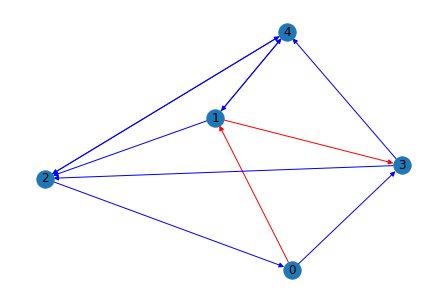

DFS:  [(0, 1), (1, 3)]


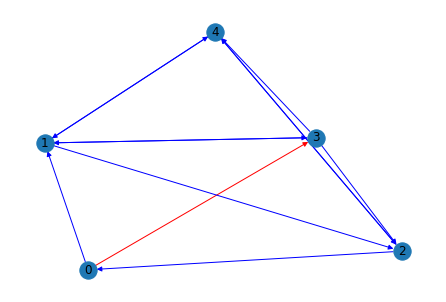

BFS:  [0, 3]


In [ ]:
bfs_dfs()

# Hill Climbing

In [ ]:
def inp():

    points: Dict = {
            'S': [1,2],
            'A': [2,3],
            'B': [2,4],
            'C': [2,2],
            'D': [1,4],
            'E': [3,4],
            'F': [3,2],
            'G': [4,4],
            'H': [3,3],
            'I': [3,1]
        }

# =============================================================================
#     points: Dict = {}
#     cnt: int = int(input("Number of points:"))
#     for i in range(cnt):
#         key: str = input("Point tag: ")
#         val = input("Point co-rods: ")
#         val = val.split(",")
#         val = [int(i) for i in val]
#         points[key] = val
# =============================================================================

    edges = {
        'S': ['A'],
        'A': ['B','S','C'],
        'B': ['D', 'E'],
        'C': ['A','I', 'F'],
        'D': ['B'],
        'E': ['B', 'H', 'G'],
        'F': ['C', 'H'],
        'G': ['E'],
        'H': ['E', 'F', 'I'],
        'I': ['H', 'C']
        }

# =============================================================================
#     points: Dict = {}
#     cnt: int = int(input("Number of edges:"))
#     for i in range(cnt):
#         key: str = input("Start vertex tag: ")
#         val = input("End vertex tags: ")
#         val = val.split(",")
# =============================================================================

    return points, edges

In [ ]:
def h(x: int, y: int, x_g:int, y_g: int) -> int:
    return abs(x-x_g) + abs(y-y_g)

In [ ]:
def get_next_point(points: List, g: List) -> int:
    costs: List = [h(i[0], i[1], g[0], g[1]) for i in points]
    print("Cost: ", costs)
    return costs.index(min(costs))


In [ ]:
def hill_climbing():
    points, edges = inp()
    start = 'S'
    path = [start]
    while True:
        pos_points = [i for i in edges[start]]
        pos_points_nv = []
        for point in pos_points:
            if point not in path:
                pos_points_nv.append(point)

        if len(pos_points_nv)==0:
            break

        next_co_ords = []
        for i in pos_points_nv:
            next_co_ords.append(points[i])

        print("PP: ", pos_points)
        print("PP nv: ", pos_points_nv)

        next_point = pos_points_nv[get_next_point(next_co_ords, points['G'])]

        print("Next p: ", next_point)
        print("Path: ", path)
        print("---------------------------------")

        path.append(next_point)
        start = next_point
        if next_point == 'G':
            break

    print("Answer: ", path)


In [ ]:
hill_climbing()

PP:  ['A']
PP nv:  ['A']
Cost:  [3]
Next p:  A
Path:  ['S']
---------------------------------
PP:  ['B', 'S', 'C']
PP nv:  ['B', 'C']
Cost:  [2, 4]
Next p:  B
Path:  ['S', 'A']
---------------------------------
PP:  ['D', 'E']
PP nv:  ['D', 'E']
Cost:  [3, 1]
Next p:  E
Path:  ['S', 'A', 'B']
---------------------------------
PP:  ['B', 'H', 'G']
PP nv:  ['H', 'G']
Cost:  [2, 0]
Next p:  G
Path:  ['S', 'A', 'B', 'E']
---------------------------------
Answer:  ['S', 'A', 'B', 'E', 'G']


# 8-Puzzle (using Hill Climbing)

In [ ]:
pos_map = {
    1: [2, 4],
    2: [1, 3, 5],
    3: [2, 6],
    4: [1, 5, 7],
    5: [2, 4, 6, 8],
    6: [3, 5, 9],
    7: [4, 8],
    8: [5, 7, 9],
    9: [6, 8]
    }

In [ ]:
goal_state = [0, 1, 2, 3, 4, 5, 6, 7, 8]
moves = []
counter = 0

In [ ]:
def program_input():
    start_state = [7,2,4,5,0,6,8,3,1]
    # user_inp = input("Enter start state: ")
    # start_state = [int(i) for i in user_inp.split(",")]
    return start_state

In [ ]:
def heurestic(curr_state: List):
    return sum( [abs(i-j) for i,j in zip(curr_state, goal_state)] )

In [ ]:
act_pos = {
  0: [0, 0], 
  1: [0, 1], 
  2: [0, 2],
  3: [1, 0], 
  4: [1, 1],
  5: [1, 2],
  6: [2, 0],
  7: [2, 1],
  8: [2, 2],
}

In [ ]:
def manhattan_dist(curr_state: List):
  dist = 0
  for i in range(3):
    for j in range(3):
      dist += abs(act_pos[curr_state[i*3+j]][0] - i) + abs(act_pos[curr_state[i*3+j]][1] - j)
      # print(f"ele: {act_pos[curr_state[i*3+j]]}, dist: {dist}, i: {i}, j: {j}")
  return dist


In [ ]:
manhattan_dist([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
def possible_states(curr_state: List):
    empty_cell = curr_state.index(0)
    moves = []
    for i in pos_map[empty_cell+1]:
        move =  deepcopy(curr_state)
        move[empty_cell] = curr_state[i-1]
        move[i-1] = 0
        # print("Move: ", move)
        moves.append(move)

    # print("Next_moves: ", *moves, sep="\n", end="\n\n")
    return moves

In [ ]:
def display(state: List):
    print(state[0:3])
    print(state[3:6])
    print(state[6:9])

In [ ]:
def next_best_move(possible_moves):
    moves_costs = [manhattan_dist(possible_move) for possible_move in possible_moves]
    # print("nbm <-- ")
    # for i in range(len(possible_moves)):
    #     print("\nMove: ")
    #     display(possible_moves[i])
    #     print("Cost: ", moves_costs[i])
    # print("-->")
    for i in range(len(possible_moves)):
        best_move_pos = moves_costs.index(max(moves_costs))
        yield possible_moves[best_move_pos], moves_costs[best_move_pos]
        moves_costs[best_move_pos] = 0 # float("Inf")

In [ ]:
def eight_puzzle():
    
    start_state = program_input()
    moves = [start_state]
    i = 0
    already = []
    while len(moves)!=0:
        
        global counter
        print('-'*100)
        print("Iteration: ", counter)
        print("\nCurrent state:")
        counter+=1

        curr_state = moves.pop(0)
        display(curr_state)
        already.append(curr_state)

        if curr_state==goal_state:
            break
        
        possible_moves = possible_states(curr_state)
        for move in next_best_move(possible_moves):
            if move[0] not in already:
                print("\nAdded to stack: ")
                moves.insert(0, move[0])
                display(move[0])
                print("Cost: ", move[1])
                
        if i == 20000:
            break
        i+=1

eight_puzzle()

# A-Star

In [ ]:
def input_data():
    heuristic_costs = {
                "S": 17,
                "A": 10,
                "B": 13,
                "C": 4,
                "D": 2,
                "E": 4,
                "F": 1,
                "G": 0
            }
    
    edges = {
                "S": [["A", 6],["B", 5],["C", 10]],
                "A": [["E", 6]],
                "B": [["E", 6], ["D", 7]],
                "C": [["D", 6]],
                "D": [["F", 6]],
                "E": [["F", 4]],
                "F": [["G", 3]],
            }
    return heuristic_costs, edges

In [ ]:
def prune_memeber_paths(paths: List):
    
    for i, path1 in enumerate(paths):
        for j, path2 in enumerate(paths):
            if path1[1] in path2[1] and path1[0] >= path2[0] and i!=j:
                paths.pop(paths.index(path1))
                break
    # print("-->", paths)
    return paths

In [ ]:
def a_star():
    h_costs, edges = input_data()
    
    import heapq
    heap = []
    heapq.heappush(heap, [17, "S"])
    while len(heap)!=0:
        curr = heapq.heappop(heap)
        # print("Curr: ", curr, curr[1][-1])
        if curr[1][-1]=="G":
            print("\nAns: ", curr)
            break
        for i in edges[curr[1][-1]]:
            cost = curr[0] + i[1] + h_costs[i[0]] - h_costs[curr[1][-1]]
            heapq.heappush(heap, [cost, curr[1]+i[0]])
            
        heap[:] = prune_memeber_paths(heap)
        heapq.heapify(heap)
        print("Heap: ", heap)            

In [ ]:
a_star()

Heap:  [[14, 'SC'], [18, 'SB'], [16, 'SA']]
Heap:  [[16, 'SA'], [18, 'SB'], [18, 'SCD']]
Heap:  [[16, 'SAE'], [18, 'SCD'], [18, 'SB']]
Heap:  [[17, 'SAEF'], [18, 'SCD'], [18, 'SB']]
Heap:  [[18, 'SB'], [18, 'SCD'], [19, 'SAEFG']]
Heap:  [[14, 'SBD'], [15, 'SBE'], [18, 'SCD'], [19, 'SAEFG']]
Heap:  [[15, 'SBE'], [19, 'SAEFG'], [18, 'SCD'], [19, 'SBDF']]
Heap:  [[16, 'SBEF'], [18, 'SCD'], [19, 'SBDF'], [19, 'SAEFG']]
Heap:  [[18, 'SBEFG'], [18, 'SCD'], [19, 'SBDF'], [19, 'SAEFG']]

Ans:  [18, 'SBEFG']


# River Crossing (using A-star)

In [ ]:
goal_state = [0, 0, "RIGHT", 3, 3]

In [ ]:
dir = {
    "LEFT": "RIGHT",
    "RIGHT": "LEFT",
}

In [ ]:
def heurestic(curr_state: List):
    return curr_state[0]+curr_state[1]-curr_state[4]-curr_state[3]

In [ ]:
def next_step():
    pass

In [ ]:
def possible_moves(curr_state: List):
  # [3,3,"LEFT",0,0] -> [[1,3,"RIGHT",0,2], [3,1,"RIGHT",2,0], [2,2,"RIGHT",1,1]] [C,M,turn,M,C]
  moves = []

  if curr_state[2] == "LEFT":
    pos1, pos2 = 0, 1
  else:
    pos1, pos2 = -1, -2
  
  if curr_state[pos1]>=2:
    temp_state = curr_state.copy()
    temp_state[pos1]-=2
    temp_state[-pos1-1]+=2
    temp_state[2] = dir[temp_state[2]]
    moves.append(temp_state)
  if curr_state[pos2]>=2:
    temp_state = curr_state.copy()
    temp_state[pos2]-=2
    temp_state[-pos2-1]+=2
    temp_state[2] = dir[temp_state[2]]
    moves.append(temp_state)
  if curr_state[pos1]>=1 and curr_state[pos2]>=1:
    temp_state = curr_state.copy()
    temp_state[pos1]-=1
    temp_state[pos2]-=1
    temp_state[-pos1-1]+=1
    temp_state[-pos2-1]+=1
    temp_state[2] = dir[temp_state[2]]
    moves.append(temp_state)
  if curr_state[pos1]>=1:
    temp_state = curr_state.copy()
    temp_state[pos1]-=1
    temp_state[-pos1-1]+=1
    temp_state[2] = dir[temp_state[2]]
    moves.append(temp_state)
  if curr_state[pos2]>=1:
    temp_state = curr_state.copy()
    temp_state[pos2]-=1
    temp_state[-pos2-1]+=1
    temp_state[2] = dir[temp_state[2]]
    moves.append(temp_state)
  return moves

In [ ]:
def valid(move: List):
  if (move[0]<=move[1] or move[1]==0) and ( move[-1]<=move[-2] or move[-2]==0):
    return True
  return False

In [ ]:
def river_crossing():

    import heapq
    heap = []
    curr_state = [3,3, "LEFT", 0, 0]
    # cannbals, monks, direction, monks, cannibals
    heapq.heappush(heap, [heurestic(curr_state), curr_state])
    cnt = 0
    visited = []
    while len(heap)!=0:
        curr = heapq.heappop(heap)
        if curr in visited:
          continue
        else:
          visited.append(curr)
        print(f"Iteration {cnt+1}: ", curr[1])
        cnt += 1
        if curr[1]==goal_state:
            break
        # print(*possible_moves(curr[1]), sep="\n")
        for move in possible_moves(curr[1]):            
            if valid(move):
              cost = heurestic(move)
              heapq.heappush(heap, [cost, move])
        # print("Heap: ", heap)  

river_crossing()

Iteration 1:  [3, 3, 'LEFT', 0, 0]
Iteration 2:  [1, 3, 'RIGHT', 0, 2]
Iteration 3:  [2, 2, 'RIGHT', 1, 1]
Iteration 4:  [2, 3, 'LEFT', 0, 1]
Iteration 5:  [0, 3, 'RIGHT', 0, 3]
Iteration 6:  [1, 3, 'LEFT', 0, 2]
Iteration 7:  [1, 1, 'RIGHT', 2, 2]
Iteration 8:  [2, 2, 'LEFT', 1, 1]
Iteration 9:  [2, 0, 'RIGHT', 3, 1]
Iteration 10:  [3, 0, 'LEFT', 3, 0]
Iteration 11:  [1, 0, 'RIGHT', 3, 2]
Iteration 12:  [1, 1, 'LEFT', 2, 2]
Iteration 13:  [0, 0, 'RIGHT', 3, 3]


# Fuzzy Logic

Worksheet questions

In [ ]:
from __future__ import annotations
from typing import Dict, List, Type

## fuzzy set class

In [ ]:
class FuzzySet():
    
    def __init__(self, d: Dict):
        self.fset: Dict = d.copy()
        
    def union(self, set2: FuzzySet) -> FuzzySet:
        d = self.fset.copy()
        for key, val in set2.fset.items():
            if key in d.keys():
                d[key] = max(d[key], val)
            else:
                d[key] = val
        
        return FuzzySet(d)
        
    def intersection(self, set2: FuzzySet) -> FuzzySet:
        d= {}
        for key, val in self.fset.items():
            if key in set2.fset.keys():
                d[key] = min(val, set2.fset[key])
                
        return FuzzySet(d)

    def compliment(self) -> FuzzySet:
        d = {}
        for key, value in self.fset.items():
            d[key] = round(1-value, 2)
            
        return FuzzySet(d)

    def difference(self, set2: FuzzySet) -> FuzzySet:
        d = {}
        for key, val in self.fset.items():
            if key in set2.fset.keys():
                d[key] = round(min(val, 1-set2.fset[key]), 2)
                
        return FuzzySet(d)

    def __str__(self) -> str:
        pr = "{"
        for key, val in self.fset.items():
            pr += str(key) + ": " + str(val) + ", "
        
        pr += "}"
        return pr

    def cartesian_product(self, set2: FuzzySet) -> List:
      cp = []
      for i in self.fset:
        temp = []
        for j in set2.fset:
           temp.append(min(self.fset[i], set2.fset[j]))
        cp.append(temp)
        
      return cp



## De Morgan's for Fuzzy sets

In [ ]:
def de_morgans(f1: FuzzySet, f2:FuzzySet):

    print("\nDe Morgan's 1st law: ")

    exp1 = f1.intersection(f2).compliment()
    exp2 = f1.compliment().union(f2.compliment()) 
    print(exp1)
    print(exp2)

    if exp1.fset == exp2.fset:
        print("--> Satisfies")
    else:
        print("--> Does not satisy")
    
    print("\nDe Morgan's 2nd law: ")

    exp1 = f1.union(f2).compliment()
    exp2 = f1.compliment().intersection(f2.compliment()) 
    print(exp1)
    print(exp2)

    if exp1.fset == exp2.fset:
        print("--> Satisfies")
    else:
        print("--> Does not satisy")


## Min-max composition on fuzzy realtions

In [ ]:
def min_max_composition(R: List, S: List):
  RoS = []
  S = [list(i) for i in zip(*S)]
  for i in R:
    t = []
    for j in S:
      c = 0
      for t1, t2 in zip(i,j):
        c = max(c, min(t1, t2))
      t.append(c)
      # print(i, " | ", j, "-->", t)
    RoS.append(t)
  
  return RoS

Driver program for basic operations on fuzzy sets

In [ ]:
def fuzzy_demo():
    a = {2:1, 3:0.4, 1:0.6, 4:0.2}
    b = {2:0, 3:0.2, 1:0.2, 4:0.8}
    
    f1 = FuzzySet(a)
    f2 = FuzzySet(b)

    print("f1: \t", f1)
    print("f2: \t", f2)
    print("f1 U f2: ", f1.union(f2))
    print("f1 ^ f2: ", f1.intersection(f2))
    print("~f1: \t", f1.compliment())
    print("f1 - f2: ", f1.difference(f2))
    de_morgans(f1, f2)

    a = {2:1, 3:0.4, 1:0.6, 4:0.2}
    b = {5:0, 7:0.2, 6:0.2, 8:0.8}
    c = {2:0.5, 3:0.6, 1:0.1, 4:0.9}

    fa = FuzzySet(a)
    fb = FuzzySet(b)
    fc = FuzzySet(c)

    Rel_R = fa.cartesian_product(fb)
    Rel_S = fa.cartesian_product(fc)

    print("R = A X B: ", Rel_R)
    print("S = A X C: ", Rel_S)

    print("\nMin-Max Composition (R & S):", *min_max_composition(R, S), sep="\n")

fuzzy_demo()

f1: 	 {2: 1, 3: 0.4, 1: 0.6, 4: 0.2, }
f2: 	 {2: 0, 3: 0.2, 1: 0.2, 4: 0.8, }
f1 U f2:  {2: 1, 3: 0.4, 1: 0.6, 4: 0.8, }
f1 ^ f2:  {2: 0, 3: 0.2, 1: 0.2, 4: 0.2, }
~f1: 	 {2: 0, 3: 0.6, 1: 0.4, 4: 0.8, }
f1 - f2:  {2: 1, 3: 0.4, 1: 0.6, 4: 0.2, }

De Morgan's 1st law: 
{2: 1, 3: 0.8, 1: 0.8, 4: 0.8, }
{2: 1, 3: 0.8, 1: 0.8, 4: 0.8, }
--> Satisfies

De Morgan's 2nd law: 
{2: 0, 3: 0.6, 1: 0.4, 4: 0.2, }
{2: 0, 3: 0.6, 1: 0.4, 4: 0.2, }
--> Satisfies
R = A X B:  [[0, 0.2, 0.2, 0.8], [0, 0.2, 0.2, 0.4], [0, 0.2, 0.2, 0.6], [0, 0.2, 0.2, 0.2]]
S = A X C:  [[0.5, 0.6, 0.1, 0.9], [0.4, 0.4, 0.1, 0.4], [0.5, 0.6, 0.1, 0.6], [0.2, 0.2, 0.1, 0.2]]

Min-Max Composition (R & S):
[0.6, 0.5, 0.3]
[0.8, 0.4, 0.7]


## Fuzzy membership Functions using [pyit2fls](https://haghrah.github.io/PyIT2FLS/overview.html)

In [ ]:
!pip install pyit2fls

In [ ]:
from pyit2fls import IT2FS, trapezoid_mf, tri_mf, gaussian_mf

In [ ]:
from numpy import linspace

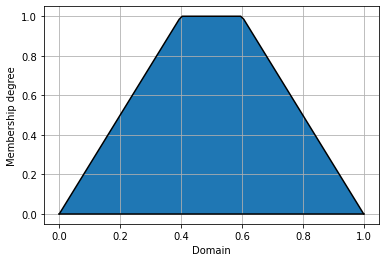

In [ ]:
Trap_Set = IT2FS(linspace(0.,1.,100), trapezoid_mf, [0, 0.4, 0.6, 1., 1.])
Trap_Set.plot(filename="Trap_Set")

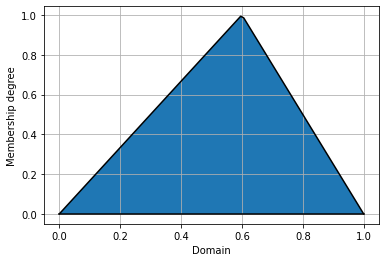

In [ ]:
Tri_Set = IT2FS(linspace(0.,1.,100), tri_mf, [0, 0.6, 1., 1.])
Tri_Set.plot(filename="Tri_Set")

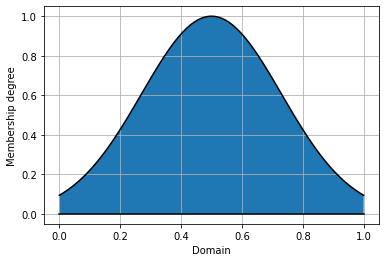

In [ ]:
Gauss_Set = IT2FS(linspace(0., 1., 100), gaussian_mf, [0.5, 0.23, 1])
Gauss_Set.plot(filename="Gauss_Set")

## Fuzzy Control System example

In [ ]:
import matplotlib.pyplot as plt

Speed Diff, Acceleration & Throttle Control

In [ ]:
height = 1

membership_values = {
  "nm": [31, 61, 95],
  "ns": [61, 95, 127],
  "ze": [95, 127, 159],
  "ps": [127, 159, 191],
  "pm": [159, 191, 223],
  "nl": [0, 0, 31, 61],
  "pl": [191, 223, 255, 280],
}

rules = [["nl", "ze", "pl"],
         ["ze", "nl", "pl"],
         ["nm", "ze", "pm"],
         ["ns", "ps", "ps"],
         ["ps", "ns", "ns"],
         ["pl", "ze", "nl"],
         ["ze", "ns", "ps"],
         ["ze", "nm", "pm"]]

In [ ]:
def is_valid_rule(speed_rule, speed, acc_rule, acc):
    speed_membership = membership_values[speed_rule]
    acc_membership = membership_values[acc_rule]

    if speed_membership[0] <= speed and speed <= speed_membership[-1]:
        if acc_membership[0] <= acc and acc <= acc_membership[-1]:
            return True
    
    return False

In [ ]:
def fuzzyfication(rule, speed, acc):
    speed_mem = membership_values[rule[0]]
    acc_mem = membership_values[rule[1]]

    u_speed = max(min( (speed - speed_mem[0])/(speed_mem[1]- speed_mem[0]), (speed_mem[2]-speed)/(speed_mem[2]-speed_mem[1])), 0)
    u_acc = max(min((acc - acc_mem[0])/ (acc_mem[1] - acc_mem[0]), (acc_mem[2] - acc)/ (acc_mem[2]- acc_mem[1])), 0)

    return min(u_acc, u_speed)

In [ ]:
def calculate_area_and_weighted_area(rule, fuzzy_value):
    throttle_mem = membership_values[rule[2]]
    
    m1 = (1 - 0)/(throttle_mem[1] - throttle_mem[0])
    m2 = (0 - 1)/(throttle_mem[2] - throttle_mem[1])
    
    a1 = (fuzzy_value - 0 + m1*throttle_mem[0])/m1
    a2 = (fuzzy_value - 1 + m2*throttle_mem[1])/m2
    
    a = a2 - a1
    b = throttle_mem[2] - throttle_mem[0]
    
    plt.plot([a1, a2], [fuzzy_value, fuzzy_value])
    
    area = 0.5 * fuzzy_value * (a + b)
    weighted_area = area * throttle_mem[1]
    
    return (area, weighted_area)

In [ ]:
def plot_graph():

  for label in membership_values:
    if len(membership_values[label]) == 4:
      plt.plot(membership_values[label], [0, 1, 1, 0], label=label)
    else:
      plt.plot(membership_values[label], [0, 1, 0], label=label)  


In [ ]:
def calculate_throttle_control(speed, acceleration):
    weighted_area_sum = 0
    area_sum = 0
    
    for rule in rules:
        if is_valid_rule(rule[0], speed, rule[1], acceleration):
            print(rule)
            fuzzy_value = fuzzyfication(rule, speed, acceleration)
            x, y = calculate_area_and_weighted_area(rule, fuzzy_value)
            area_sum+=x
            weighted_area_sum+=y
            
    print(weighted_area_sum/area_sum)
            

['nm', 'ze', 'pm']
['ns', 'ps', 'ps']
185.84166090091955


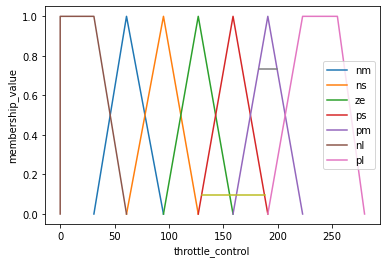

In [ ]:
def fuzzy_control_system():
    plot_graph()
    
    plt.xlabel("throttle_control")
    plt.ylabel("membership_value")
    
    calculate_throttle_control(70, 130)

    plt.legend()
    plt.show()

fuzzy_control_system()

# Kohenan SOM

In [ ]:
ipV = [[0.2,0.4]]
w = [[0.5,0.2],[0.1,0.4],[0.1,0.4],[0.6,0.9],[0.9,0.1]]

# ipV = [[1, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 1], [0, 0, 0, 1]]
# w = [[0.2, 0.6, 0.5, 0.9], [0.8, 0.4, 0.7, 0.3]]

alpha = 0.3

In [ ]:
for ip in ipV:

    print(f"Input: {ip}")

    c = []
    for weight in w:
        c.append( sum([(i-j)**2 for i,j in zip(ip, weight)]) )

    pos = c.index(min(c))
    print(f"Winning cluster: {pos}")

    # Weight updation for winning cluster
    for j in range(len(ip)):
        w[pos][j] += alpha*(ip[j] - w[pos][j])

print(w)


Input: [0.2, 0.4]
Winning cluster: 1
[[0.5, 0.2], [0.13, 0.4], [0.1, 0.4], [0.6, 0.9], [0.9, 0.1]]


# Hidden Markov Model

## HMM (Prob)

In [ ]:
h = {"a":0.2,"c":0.3,"g":0.3,"t":0.2,"h":0.5,"l":0.5}
l = {"a":0.3,"c":0.2,"g":0.2,"t":0.3,"l":0.6,"h":0.4}

startH = 0.5
startL = 0.5

pattern = "ggcactgaa"

In [ ]:
hp = [0.5*h[pattern[0]]]
lp = [0.5*l[pattern[0]]]

In [ ]:
for char in pattern[1:]:
    xh = h[char] * max(hp[-1]*h['h'] , lp[-1]*l['h'])
    xl = l[char] * max(hp[-1]*h['l'] , lp[-1]*l['l'])

    hp.append(xh)
    lp.append(xl)

In [ ]:
print(hp, "\n", lp)

[0.15, 0.0225, 0.003375, 0.0003375, 6.074999999999999e-05, 6.0749999999999994e-06, 1.3122e-06, 1.3122e-07, 1.889568e-08] 
 [0.1, 0.015, 0.00225, 0.00050625, 6.075e-05, 1.0935e-05, 1.3122e-06, 2.3619599999999995e-07, 4.251527999999999e-08]


In [ ]:
for i,j in zip(lp, hp):
    if i>=j:
        print("L", end='')
    else:
        print("H", end='')

HHHLLLLLL

## HMM (log Prob)

In [ ]:
h = {"a":-2.322,"c":-1.737,"g":-1.737,"t":-2.322,"h":-1,"l":-1}
l = {"a":-1.737,"c":-2.322,"g":-2.322,"t":-1.737,"l":-0.737,"h":-1.322}

startH = -1
startL = -1

pattern = "ggcactgaa"

In [ ]:
hp = [startH + h[pattern[0]]]
lp = [startL + l[pattern[0]]]

In [ ]:
for char in pattern[1:]:
    
    ha = h[char] + max(hp[-1] + h['h'], lp[-1] + l['h'])
    la = l[char] + max(hp[-1] + h['l'], lp[-1] + l['l'])

    hp.append(ha)
    lp.append(la)

In [ ]:
for i,j in zip(hp, lp):

    if i>j:
        print("H", end = " ")
    else:
        print("L", end = " ")

H H H L H L L L L 

# Single Layer Perceptron

In [ ]:
inst = [["mi",11,13],["mi",9,12],["mi",8.5,18],["mi",12,8],["mi",13,18],["a",18,5],["a",20,7.5]
     ,["a",16.5,6],["a",19,6.5],["a",12,9]]

w = [0.3, 0.6]
aplha = 0.0001 

In [ ]:
w_next = []
while w!=w_next:
    w_next = w[:]
    for inp in inst:
        x = sum([i*j for i,j in zip(inp[1:], w)]) 
        print(f"--> x: {x}")

        if x > 0 and inp[0] != "mi":
            w = [round(i+ aplha*(-1)*j, 3) for i,j in zip(w, inp[1:])]
            print(f"Updated w: {w}")

        if x <0 and inp[0] != "a":
            w = [round(i+ aplha*(1)*j, 3) for i,j in zip(w, inp[1:])]
            print(f"Updated w: {w}")
